In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
import pandas as pd
import numpy as np

In [2]:
# Set default sizes for figures.
plt.style.use("default") # style matplotlib
plt.rc("axes", labelsize = 18) # fontsize of the x and y labels
plt.rc("axes", titlesize = 18) # fontsize of the axes title
plt.rc("xtick", labelsize = 15) # fontsize of the tick labels
plt.rc("ytick", labelsize = 15) # fontsize of the tick labels
plt.rc("legend", fontsize = 15) # legend fontsize

In [3]:
def f_loss(x, axis, level, func):
    # Model.
    model = func(x.xs("FCG", axis = axis, level = level), x.xs("Forecast", axis = axis, level = level)) 
    return pd.Series([model], index = ["mse_model"])

# Analysis

In [4]:
PROJECT_ROOT = "./RESULTS/Review/Yemen/"

## Training on all provinces (full training)

In [5]:
# Define directory where the results about the training on all the provinces are stored.
DIR_RESULTS = PROJECT_ROOT + "2018-07-02 (2018-08-14)"

# Load forecasting results for each split.
xls = pd.ExcelFile(DIR_RESULTS + f"/standard/out_test/forecast.xlsx")

forecast_tmp = dict()
for split in xls.sheet_names[1:]:
    forecast = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
    # Reset the index.
    forecast.index = np.arange(1, len(forecast) + 1)
    forecast.index.names = ["Prediction horizon"]
    # Save the predictions.
    forecast_tmp[split] = forecast
    
forecast_full = pd.concat(forecast_tmp, axis = 1)
forecast_full.columns.rename("Split", level = 0, inplace = True)
forecast_full = forecast_full.drop("Naive", axis = 1, level = "Indicator")
forecast_full.head()

Split               Split 1                                          \
Country               Yemen                                           
AdminStrata           Abyan                Aden            Al Bayda   
Indicator               FCG   Forecast      FCG   Forecast      FCG   
Prediction horizon                                                    
1                   33.8163  33.396016  28.3226  26.254717  53.6394   
2                   33.5809  33.248878  28.6218  26.594476  53.1773   
3                   33.3487  33.219844  28.5255  26.818723  51.7404   
4                   37.2396  33.298253  27.2494  26.945629  52.0785   
5                   36.1143  33.473442  28.0367  26.993364  52.8980   

Split                                                                       \
Country                                                                      
AdminStrata                   Al Dhale'e            Al Hudaydah              
Indicator            Forecast        FCG   Forecast         FCG   Forecast   
Prediction horizon                                                           
1                   55.341925    56.7963  56.906261     29.1597  27.516806   
2                   55.117853    57.5593  56.391332     28.4632  27.645093   
3                   54.993632    56.1376  56.110019     29.9291  27.704640   
4                   54.953418    54.3724  56.022151     30.5106  27.710498   
5                   54.981369    53.8939  56.087559     30.5106  27.677723   

Split               ... Split 10                                          \
Country             ...    Yemen                                           
AdminStrata         ...   Raymah              Sa'ada              Sana'a   
Indicator           ...      FCG   Forecast      FCG   Forecast      FCG   
Prediction horizon  ...                                                    
1                   ...  59.2371  58.815411  39.6053  40.466218  42.6981   
2                   ...  60.3137  58.732031  41.1750  40.018715  43.8512   
3                   ...  59.1804  58.702307  41.2592  39.743649  44.5177   
4                   ...  60.7225  58.711486  39.7669  39.604789  44.6783   
5                   ...  61.2901  58.744814  40.7872  39.565905  42.8225   

Split                                                                  
Country                                                                
AdminStrata                    Shabwah               Taizz             
Indicator            Forecast      FCG   Forecast      FCG   Forecast  
Prediction horizon                                                     
1                   44.258687  52.8051  53.265656  41.5994  44.530555  
2                   44.222187  52.4924  53.399596  40.7057  44.418538  
3                   44.234696  54.2902  53.453410  42.4463  44.358294  
4                   44.285709  55.4377  53.441027  42.9934  44.334623  
5                   44.364721  55.5760  53.376380  44.3141  44.332324  

[5 rows x 400 columns]

## Training on subset of provinces (partial training)

In [6]:
# Define directories where the analysis about the random selection of the provinces are performed.
N_PROVINCES = ["4", "8", "12", "16"]
DIR_RESULTS = [PROJECT_ROOT + "4_provinces", PROJECT_ROOT + "8_provinces", 
               PROJECT_ROOT + "12_provinces", PROJECT_ROOT + "16_provinces"]
# Define the seeds used for each analysis.
SEEDS = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [7]:
# Get the results obtained in partial training mode.
n_provinces_results = {}
for N_PROVINCE in N_PROVINCES:
    DIR_RESULTS = PROJECT_ROOT + f"{N_PROVINCE}_provinces"

    forecast_tmp = {}
    # Forecasting results.
    for SEED in SEEDS:
        # Load forecasting results for each split.
        xls = pd.ExcelFile(DIR_RESULTS + f"/{SEED}/out_test/forecast.xlsx")
        forecast_all_splits = dict()
        for split in xls.sheet_names[1:]:
            forecast = pd.read_excel(xls, split, index_col = 0, header = [0, 1, 2])
            # Reset the index.
            forecast.index = np.arange(1, len(forecast) + 1)
            forecast.index.names = ["Prediction horizon"]
            # Save the predictions.
            forecast_all_splits[split] = forecast

        # We have the predictions for each split of the current seed.
        forecast_all_splits = pd.concat(forecast_all_splits, axis = 1)
        forecast_all_splits.columns.rename("Split", level = 0, inplace = True)
        forecast_tmp[SEED] = forecast_all_splits  

    # Concatenate all predictions over different seeds.
    forecast_partial = pd.concat(forecast_tmp, axis = 1)
    forecast_partial.columns.rename("Seed", level = 0, inplace = True)
    # Store results.
    n_provinces_results[N_PROVINCE] = forecast_partial

forecast_partial = pd.concat(n_provinces_results, axis = 1)
forecast_partial.columns.rename("n° provinces", level = 0, inplace = True)
forecast_partial.drop("Naive", axis = 1, level = "Indicator", inplace = True)
forecast_partial.head()

n° provinces               4                                          \
Seed                       0                                           
Split                Split 1                                           
Country                Yemen                                           
AdminStrata        Al Mahwit               Marib              Sa'ada   
Indicator                FCG   Forecast      FCG   Forecast      FCG   
Prediction horizon                                                     
1                    39.0063  39.282385  31.2554  31.936834  32.3603   
2                    38.4705  39.186863  31.3368  31.742606  32.8830   
3                    38.3364  39.058086  30.3309  31.835020  29.2632   
4                    36.9424  38.904838  30.4101  32.164021  30.1817   
5                    35.9492  38.735903  29.2237  32.679554  27.8481   

n° provinces                                                            ...  \
Seed                                                                    ...   
Split                                               Split 2             ...   
Country                                               Yemen             ...   
AdminStrata                    Shabwah            Al Mahwit             ...   
Indicator            Forecast      FCG   Forecast       FCG   Forecast  ...   
Prediction horizon                                                      ...   
1                   32.805614  52.8496  53.091493   36.7053  36.883396  ...   
2                   32.735356  52.4473  52.507753   37.1343  36.971593  ...   
3                   32.671868  52.6418  51.938327   37.4198  37.182525  ...   
4                   32.618090  52.0981  51.391483   38.1276  37.481564  ...   
5                   32.576962  52.4366  50.875492   40.5437  37.834079  ...   

n° provinces             16                                          \
Seed                      9                                           
Split              Split 10                                           
Country               Yemen                                           
AdminStrata            Lahj               Marib              Raymah   
Indicator               FCG   Forecast      FCG   Forecast      FCG   
Prediction horizon                                                    
1                   54.2346  52.600438  51.1746  52.481502  59.2371   
2                   54.6419  52.640294  51.9846  52.569026  60.3137   
3                   55.0918  52.673478  53.2025  52.666299  59.1804   
4                   54.6543  52.701172  53.8803  52.766506  60.7225   
5                   54.5307  52.724559  52.9247  52.862830  61.2901   

n° provinces                                                           
Seed                                                                   
Split                                                                  
Country                                                                
AdminStrata                     Sana'a               Taizz             
Indicator            Forecast      FCG   Forecast      FCG   Forecast  
Prediction horizon                                                     
1                   58.031200  42.6981  44.410942  41.5994  44.667354  
2                   58.603565  43.8512  44.166294  40.7057  44.343988  
3                   58.927096  44.5177  44.033625  42.4463  44.148112  
4                   59.040028  44.6783  43.993717  42.9934  44.056930  
5                   58.980596  42.8225  44.027350  44.3141  44.047644  

[5 rows x 8000 columns]

### Full training results considering partial training provinces

In [8]:
# Using the results obtained in full training mode, we reproduce the table result of partial training.
n_provinces_results = {}
for N_PROVINCE in N_PROVINCES:
    forecast_tmp = {}
    # Forecasting results.
    for SEED in SEEDS:
        # Select the predictions of only the current provinces.
        forecast = forecast_full[forecast_partial[N_PROVINCE][SEED].columns]
        forecast_tmp[SEED] = forecast

    forecast_seeds = pd.concat(forecast_tmp, axis = 1)
    forecast_seeds.columns.rename("Seed", level = 0, inplace = True)
    # Store results.
    n_provinces_results[N_PROVINCE] = forecast_seeds
    
forecast_full_subsets = pd.concat(n_provinces_results, axis = 1)
forecast_full_subsets.columns.rename("n° provinces", level = 0, inplace = True)
forecast_full_subsets.head()

n° provinces               4                                          \
Seed                       0                                           
Split                Split 1                                           
Country                Yemen                                           
AdminStrata        Al Mahwit               Marib              Sa'ada   
Indicator                FCG   Forecast      FCG   Forecast      FCG   
Prediction horizon                                                     
1                    39.0063  39.196673  31.2554  31.475501  32.3603   
2                    38.4705  39.243316  31.3368  31.449126  32.8830   
3                    38.3364  39.257669  30.3309  31.530136  29.2632   
4                    36.9424  39.248712  30.4101  31.698123  30.1817   
5                    35.9492  39.225427  29.2237  31.932681  27.8481   

n° provinces                                                            ...  \
Seed                                                                    ...   
Split                                               Split 2             ...   
Country                                               Yemen             ...   
AdminStrata                    Shabwah            Al Mahwit             ...   
Indicator            Forecast      FCG   Forecast       FCG   Forecast  ...   
Prediction horizon                                                      ...   
1                   33.155254  52.8496  52.595288   36.7053  36.743371  ...   
2                   33.152763  52.4473  52.525954   37.1343  36.674609  ...   
3                   33.157882  52.6418  52.486811   37.4198  36.677263  ...   
4                   33.174321  52.0981  52.466136   38.1276  36.735065  ...   
5                   33.205790  52.4366  52.452209   40.5437  36.831746  ...   

n° provinces             16                                          \
Seed                      9                                           
Split              Split 10                                           
Country               Yemen                                           
AdminStrata            Lahj               Marib              Raymah   
Indicator               FCG   Forecast      FCG   Forecast      FCG   
Prediction horizon                                                    
1                   54.2346  52.642576  51.1746  52.149254  59.2371   
2                   54.6419  52.514083  51.9846  52.404290  60.3137   
3                   55.0918  52.429035  53.2025  52.586032  59.1804   
4                   54.6543  52.382266  53.8803  52.703152  60.7225   
5                   54.5307  52.368609  52.9247  52.764320  61.2901   

n° provinces                                                           
Seed                                                                   
Split                                                                  
Country                                                                
AdminStrata                     Sana'a               Taizz             
Indicator            Forecast      FCG   Forecast      FCG   Forecast  
Prediction horizon                                                     
1                   58.815411  42.6981  44.258687  41.5994  44.530555  
2                   58.732031  43.8512  44.222187  40.7057  44.418538  
3                   58.702307  44.5177  44.234696  42.4463  44.358294  
4                   58.711486  44.6783  44.285709  42.9934  44.334623  
5                   58.744814  42.8225  44.364721  44.3141  44.332324  

[5 rows x 8000 columns]

## Loss

In [9]:
# Compute loss over prediction horizons (the seed are considered together during mse computation).
loss_h_partial = forecast_partial.groupby(axis = 1, level = ["n° provinces", "Split"]).apply(lambda x: x.stack(["Country", "Indicator"]).groupby(axis = 0, level = ["Country", "Prediction horizon"]).apply(lambda x: f_loss(x, axis = 0, level = "Indicator", func = mse)))
loss_h_partial.columns.rename("Type", level = 2, inplace = True)
loss_h_partial.head()

n° provinces                       4                                           \
Split                        Split 1  Split 10    Split 2   Split 3   Split 4   
Type                       mse_model mse_model  mse_model mse_model mse_model   
Country Prediction horizon                                                      
Yemen   1                   1.161521  2.004734   1.354135  1.196163  1.222492   
        2                   1.975227  3.223988   2.560975  2.521711  2.539961   
        3                   5.365198  3.261219   4.869770  2.592481  2.749048   
        4                   6.093437  4.090253   8.753132  2.026314  3.655193   
        5                   9.805328  5.839921  11.621288  3.092724  5.329151   

n° provinces                                                                  \
Split                        Split 5   Split 6   Split 7   Split 8   Split 9   
Type                       mse_model mse_model mse_model mse_model mse_model   
Country Prediction horizon                                                     
Yemen   1                   0.564623  1.747061  1.090566  0.771594  2.101477   
        2                   1.751574  2.195944  1.859992  1.118653  4.333168   
        3                   2.837578  4.821718  5.927126  3.524654  6.582431   
        4                   4.311272  4.941272  5.915615  3.775426  7.331521   
        5                   6.761990  4.059458  6.217814  5.630241  7.465288   

n° provinces                ...        16                                 \
Split                       ...   Split 1  Split 10    Split 2   Split 3   
Type                        ... mse_model mse_model  mse_model mse_model   
Country Prediction horizon  ...                                            
Yemen   1                   ...  1.037712  1.268641   1.181512  0.739977   
        2                   ...  1.701312  2.174157   2.673174  1.949842   
        3                   ...  4.818486  2.661803   5.652388  2.512302   
        4                   ...  4.834364  3.661331   8.493081  2.249682   
        5                   ...  7.345340  4.445960  10.293714  3.525856   

n° provinces                                                                  \
Split                        Split 4   Split 5   Split 6   Split 7   Split 8   
Type                       mse_model mse_model mse_model mse_model mse_model   
Country Prediction horizon                                                     
Yemen   1                   0.666847  0.425610  1.038529  0.674236  0.557917   
        2                   1.548218  1.811992  1.826058  1.381679  0.872732   
        3                   1.638689  2.936749  4.059933  3.958037  2.534455   
        4                   2.236535  4.955975  4.378651  4.125436  3.253462   
        5                   3.493830  8.706344  3.498759  4.762430  5.845965   

n° provinces                          
Split                        Split 9  
Type                       mse_model  
Country Prediction horizon            
Yemen   1                   1.424487  
        2                   2.223111  
        3                   3.734987  
        4                   3.708207  
        5                   4.936510  

[5 rows x 40 columns]

In [10]:
# Compute loss over prediction horizons (the seed are considered together during mse computation).
loss_h_full = forecast_full_subsets.groupby(axis = 1, level = ["n° provinces", "Split"]).apply(lambda x: x.stack(["Country", "Indicator"]).groupby(axis = 0, level = ["Country", "Prediction horizon"]).apply(lambda x: f_loss(x, axis = 0, level = "Indicator", func = mse)))
loss_h_full.columns.rename("Type", level = 2, inplace = True)
loss_h_full.head()

n° provinces                       4                                           \
Split                        Split 1  Split 10    Split 2   Split 3   Split 4   
Type                       mse_model mse_model  mse_model mse_model mse_model   
Country Prediction horizon                                                      
Yemen   1                   0.999699  1.578378   1.422238  0.964632  0.707800   
        2                   1.550040  3.126360   2.364051  2.615998  1.884587   
        3                   4.866900  3.118697   4.853133  2.316289  2.070002   
        4                   6.063517  3.889567   8.358836  1.342810  2.806654   
        5                   9.289030  4.825800  11.038888  2.139876  3.526847   

n° provinces                                                                  \
Split                        Split 5   Split 6   Split 7   Split 8   Split 9   
Type                       mse_model mse_model mse_model mse_model mse_model   
Country Prediction horizon                                                     
Yemen   1                   0.356915  1.554655  0.679323  0.461401  2.179152   
        2                   1.485183  2.384420  1.297682  0.843795  4.191993   
        3                   2.015645  5.044394  4.500812  2.953118  5.725392   
        4                   3.002064  4.912341  4.114524  3.041367  6.632284   
        5                   5.367385  3.924847  4.654466  4.547326  7.262027   

n° provinces                ...        16                                 \
Split                       ...   Split 1  Split 10    Split 2   Split 3   
Type                        ... mse_model mse_model  mse_model mse_model   
Country Prediction horizon  ...                                            
Yemen   1                   ...  1.207654  1.055048   1.167632  0.674454   
        2                   ...  1.784477  2.160590   2.634052  1.904152   
        3                   ...  4.824802  2.652768   5.670185  2.364492   
        4                   ...  4.920999  3.545628   8.570971  2.071555   
        5                   ...  7.249371  4.226756  10.465698  3.442548   

n° provinces                                                                  \
Split                        Split 4   Split 5   Split 6   Split 7   Split 8   
Type                       mse_model mse_model mse_model mse_model mse_model   
Country Prediction horizon                                                     
Yemen   1                   0.638794  0.458208  1.070127  0.613418  0.432782   
        2                   1.644426  1.889726  1.933064  1.321097  0.820696   
        3                   2.005703  2.758994  4.196562  3.736448  2.386785   
        4                   2.493424  4.591640  4.547483  3.790488  3.159736   
        5                   3.713474  8.451260  3.676410  4.313387  5.767620   

n° provinces                          
Split                        Split 9  
Type                       mse_model  
Country Prediction horizon            
Yemen   1                   1.542961  
        2                   2.317375  
        3                   3.790983  
        4                   3.782098  
        5                   4.819052  

[5 rows x 40 columns]

In [11]:
# Take difference.
difference_losses = loss_h_partial - loss_h_full[loss_h_partial.columns]
difference_losses = difference_losses.droplevel(axis = 1, level = "Type")
difference_losses.head()

n° provinces                       4                                          \
Split                        Split 1  Split 10   Split 2   Split 3   Split 4   
Country Prediction horizon                                                     
Yemen   1                   0.161822  0.426356 -0.068103  0.231531  0.514693   
        2                   0.425187  0.097627  0.196924 -0.094287  0.655374   
        3                   0.498299  0.142522  0.016637  0.276192  0.679046   
        4                   0.029920  0.200686  0.394296  0.683504  0.848539   
        5                   0.516297  1.014121  0.582401  0.952848  1.802304   

n° provinces                                                                  \
Split                        Split 5   Split 6   Split 7   Split 8   Split 9   
Country Prediction horizon                                                     
Yemen   1                   0.207708  0.192407  0.411243  0.310193 -0.077676   
        2                   0.266392 -0.188476  0.562310  0.274857  0.141175   
        3                   0.821933 -0.222676  1.426314  0.571536  0.857039   
        4                   1.309208  0.028931  1.801091  0.734059  0.699238   
        5                   1.394604  0.134611  1.563348  1.082915  0.203260   

n° provinces                ...        16                                \
Split                       ...   Split 1  Split 10   Split 2   Split 3   
Country Prediction horizon  ...                                           
Yemen   1                   ... -0.169942  0.213594  0.013880  0.065522   
        2                   ... -0.083165  0.013567  0.039121  0.045690   
        3                   ... -0.006316  0.009035 -0.017797  0.147809   
        4                   ... -0.086635  0.115703 -0.077890  0.178128   
        5                   ...  0.095969  0.219204 -0.171984  0.083308   

n° provinces                                                                  \
Split                        Split 4   Split 5   Split 6   Split 7   Split 8   
Country Prediction horizon                                                     
Yemen   1                   0.028053 -0.032597 -0.031598  0.060818  0.125134   
        2                  -0.096209 -0.077734 -0.107007  0.060582  0.052037   
        3                  -0.367014  0.177755 -0.136630  0.221589  0.147671   
        4                  -0.256889  0.364335 -0.168832  0.334947  0.093725   
        5                  -0.219644  0.255084 -0.177651  0.449042  0.078345   

n° provinces                          
Split                        Split 9  
Country Prediction horizon            
Yemen   1                  -0.118474  
        2                  -0.094263  
        3                  -0.055996  
        4                  -0.073891  
        5                   0.117458  

[5 rows x 40 columns]

In [12]:
# Select some prediction horizons for visualization.
difference_losses = difference_losses.loc[(slice(None), [7, 14, 21, 28]), :]

In [13]:
LABEL = "mse$_{partial \ training}$ - mse$_{full \ training}$"

# Melt dataframe.
results = pd.melt(difference_losses.unstack("Prediction horizon"), 
                  value_name = LABEL)
results["Prediction horizon"] = results["Prediction horizon"].map({7: "1W", 14: "2W", 21: "3W", 28: "4W"})
results.head()

,n° provinces,Split,Prediction horizon,mse$_{partial \ training}$ - mse$_{full \ training}$
0,4,Split 1,1W,1.278601
1,4,Split 1,2W,3.398013
2,4,Split 1,3W,-1.953498
3,4,Split 1,4W,1.120513
4,4,Split 10,1W,1.473861


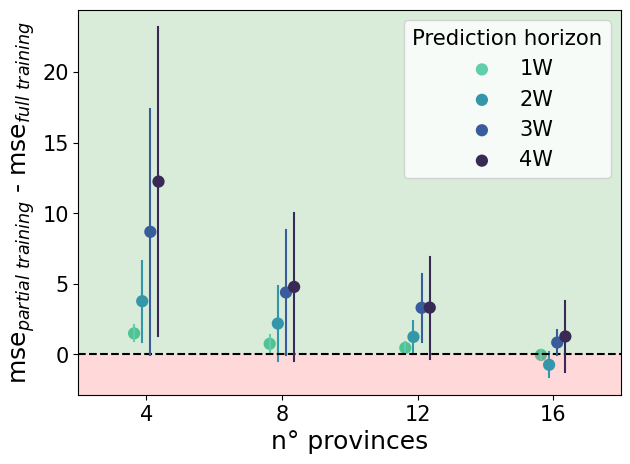

In [14]:
fig, ax = plt.subplots(figsize = (7, 5))
g = sns.pointplot(x = "n° provinces", y = LABEL, hue = "Prediction horizon", join = False, estimator = np.mean,
                  data = results, dodge = 0.18, ci = "sd", order = N_PROVINCES, errwidth = 1.5, 
                  ax = ax, palette = "mako_r")
# Additional plot features.
ax.axhline(y = 0, color = "black", linestyle = "--")
xlim = [ax.get_xlim()[0], ax.get_xlim()[1]]
ylim = [ax.get_ylim()[0], ax.get_ylim()[1]]
ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.fill_between(xlim, 0, ylim[1], facecolor = "green", alpha = 0.15)
ax.fill_between(xlim, 0, ylim[0], facecolor = "red", alpha = 0.15)

fig.savefig("./IMAGES/Review/Figure5.png" , bbox_inches = "tight", dpi = 300)